In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.shape

(4507, 21)

In [5]:
test.shape

(1127, 21)

# MI STAMPO LE FEATURE CHE COMPAIONO NEL TRAIN E NEL TEST

In [6]:
list(train)

['Churn',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [7]:
list(test)

['Churn',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

# MI STAMPO LA QUANTITA' DEI VALORI CHE ASSUMONO LE VARIE FEATURE 

In [8]:
for c in train.columns:
    print ("Features: ", c)
    print(train[c].value_counts())
    print("\n*****************\n")

Features:  Churn
No     3296
Yes    1211
Name: Churn, dtype: int64

*****************

Features:  customerID
7868-BGSZA    1
9101-NTIXF    1
7554-NEWDD    1
3537-HPKQT    1
2523-EWWZL    1
             ..
7317-GGVPB    1
9861-PDSZP    1
1930-BZLHI    1
6508-NJYRO    1
1264-BYWMS    1
Name: customerID, Length: 4507, dtype: int64

*****************

Features:  gender
Male      2299
Female    2208
Name: gender, dtype: int64

*****************

Features:  SeniorCitizen
0    3789
1     718
Name: SeniorCitizen, dtype: int64

*****************

Features:  Partner
No     2323
Yes    2184
Name: Partner, dtype: int64

*****************

Features:  Dependents
No     3167
Yes    1340
Name: Dependents, dtype: int64

*****************

Features:  tenure
1     387
72    228
2     143
4     126
3     126
     ... 
28     35
45     35
36     34
39     31
0       8
Name: tenure, Length: 73, dtype: int64

*****************

Features:  PhoneService
Yes    4072
No      435
Name: PhoneService, dtype: int64


In [9]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,3798-EPWRR,Female,1,No,No,2,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,43.95,85.1
1,No,0744-GKNGE,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),86.80,5327.25
2,No,1755-RMCXH,Male,0,Yes,Yes,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,40.25
3,No,8200-LGKSR,Male,0,Yes,No,71,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,83.20,6126.1
4,No,4698-KVLLG,Female,1,No,No,51,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.9
5,No,5876-QMYLD,Female,0,Yes,Yes,23,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.1
6,No,7956-XQWGU,Male,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.40,460.25
7,Yes,9231-ZJYAM,Female,1,No,No,4,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.85,292.8
8,Yes,2037-SGXHH,Male,0,Yes,Yes,38,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,94.65,3624.3
9,No,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.1


In [10]:
for c in test.columns:
    print ("Features: ", c)
    print(test[c].value_counts())
    print("\n*****************\n")

Features:  Churn
No     842
Yes    285
Name: Churn, dtype: int64

*****************

Features:  customerID
0815-MFZGM    1
5356-RHIPP    1
4468-YDOVK    1
7503-EPSZW    1
4641-FROLU    1
             ..
2575-GFSOE    1
3137-LUPIX    1
9921-ZVRHG    1
5609-IMCGG    1
1194-HVAIF    1
Name: customerID, Length: 1127, dtype: int64

*****************

Features:  gender
Male      588
Female    539
Name: gender, dtype: int64

*****************

Features:  SeniorCitizen
0    939
1    188
Name: SeniorCitizen, dtype: int64

*****************

Features:  Partner
No     581
Yes    546
Name: Partner, dtype: int64

*****************

Features:  Dependents
No     784
Yes    343
Name: Dependents, dtype: int64

*****************

Features:  tenure
1     89
72    58
3     35
2     31
71    28
      ..
33     7
58     7
63     7
23     6
0      2
Name: tenure, Length: 73, dtype: int64

*****************

Features:  PhoneService
Yes    1010
No      117
Name: PhoneService, dtype: int64

*****************

F

# ci sono dei valori mancanti nel train e nel test

In [11]:
print("Valori mancanti:", (train["TotalCharges"]==" ").sum())

Valori mancanti: 8


In [12]:
print("Valori mancanti:", (test["TotalCharges"]==" ").sum())

Valori mancanti: 2


# osservo il tipo dei dati

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   object 
 1   customerID        4507 non-null   object 
 2   gender            4507 non-null   object 
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   object 
 5   Dependents        4507 non-null   object 
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   object 
 8   MultipleLines     4507 non-null   object 
 9   InternetService   4507 non-null   object 
 10  OnlineSecurity    4507 non-null   object 
 11  OnlineBackup      4507 non-null   object 
 12  DeviceProtection  4507 non-null   object 
 13  TechSupport       4507 non-null   object 
 14  StreamingTV       4507 non-null   object 
 15  StreamingMovies   4507 non-null   object 
 16  Contract          4507 non-null   object 


# Mi stampo il dataset per quanto riguarda solo i record che presentano i valori nulli 

In [14]:
train.loc[train['TotalCharges'] == ' ']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
75,No,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
359,No,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
1618,No,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
1932,No,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
2327,No,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
2926,No,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
3422,No,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4174,No,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,


# Sostituisco i valori nulli con NaN sia nel train sia nel test

In [15]:
train.TotalCharges= train["TotalCharges"].replace(' ',np.NaN)

In [16]:
test.TotalCharges= test["TotalCharges"].replace(' ',np.NaN)

# verifico che non ci siano più valori rappresentati dallo spazio

In [17]:
train.loc[train['TotalCharges'] == ' ']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [18]:
test.loc[test['TotalCharges'] == ' ']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [19]:
train.loc[train['customerID'] == '4472-LVYGI']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3422,No,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN


# applico una conversione alla feature TotalCharges

In [20]:

train["TotalCharges"] = pd.to_numeric(train["TotalCharges"])

In [21]:
test["TotalCharges"] = pd.to_numeric(test["TotalCharges"])

# verifico che non si siano persi valori nulli

In [22]:
print(train.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64


In [23]:
print(test.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64


# Dato che i valori nulli sono molto pochi li posso rimpiazzare con la media totale

In [24]:
train['TotalCharges'].fillna(train['TotalCharges'].mean(), inplace=True)

In [25]:
test['TotalCharges'].fillna(test['TotalCharges'].mean(), inplace=True)

# verifico che non ci siano più valori nulli

In [26]:
print(train.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [27]:
print(test.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


# Rapida verifica per vedere che effettivamente per un costumerID che presentava valore nullo ora c'è la media

In [28]:
train.loc[train['customerID'] == '2520-SGTTA']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
75,No,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,2283.244176


# Analizzo il dataset devo convertire ad un valore numerico le etichette che presentano come dtypes degli object

In [29]:
from sklearn.preprocessing import LabelEncoder
Feature = ["Churn", "customerID", "gender", "Partner","Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
labelEncoder_X = LabelEncoder()
for element in Feature:
    train[element] = labelEncoder_X.fit_transform(train[element])
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   customerID        4507 non-null   int64  
 2   gender            4507 non-null   int64  
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   int64  
 5   Dependents        4507 non-null   int64  
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   int64  
 8   MultipleLines     4507 non-null   int64  
 9   InternetService   4507 non-null   int64  
 10  OnlineSecurity    4507 non-null   int64  
 11  OnlineBackup      4507 non-null   int64  
 12  DeviceProtection  4507 non-null   int64  
 13  TechSupport       4507 non-null   int64  
 14  StreamingTV       4507 non-null   int64  
 15  StreamingMovies   4507 non-null   int64  
 16  Contract          4507 non-null   int64  


In [30]:
from sklearn.preprocessing import LabelEncoder
Feature = ["Churn", "customerID", "gender", "Partner","Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
labelEncoder_X = LabelEncoder()
for element in Feature:
    test[element] = labelEncoder_X.fit_transform(test[element])
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             1127 non-null   int64  
 1   customerID        1127 non-null   int64  
 2   gender            1127 non-null   int64  
 3   SeniorCitizen     1127 non-null   int64  
 4   Partner           1127 non-null   int64  
 5   Dependents        1127 non-null   int64  
 6   tenure            1127 non-null   int64  
 7   PhoneService      1127 non-null   int64  
 8   MultipleLines     1127 non-null   int64  
 9   InternetService   1127 non-null   int64  
 10  OnlineSecurity    1127 non-null   int64  
 11  OnlineBackup      1127 non-null   int64  
 12  DeviceProtection  1127 non-null   int64  
 13  TechSupport       1127 non-null   int64  
 14  StreamingTV       1127 non-null   int64  
 15  StreamingMovies   1127 non-null   int64  
 16  Contract          1127 non-null   int64  


In [31]:
#profile=ProfileReport(train)
#profile.to_notebook_iframe()

## Mi stampo un grafico che mostra quanti come sono distribuiti i valori per Churn nel nostro dataset

<AxesSubplot:xlabel='Churn', ylabel='count'>

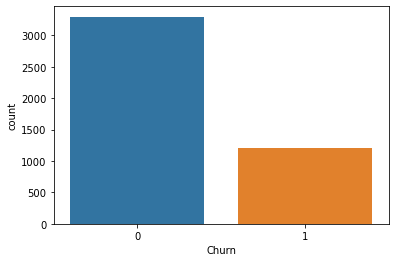

In [32]:
sns.countplot(x=train['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

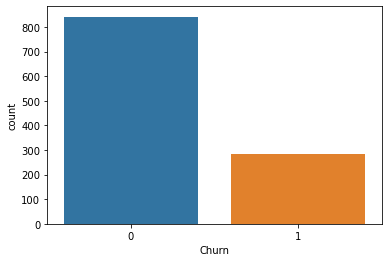

In [33]:
sns.countplot(x=test['Churn'])

## Mi stampo dei grafici per capire le dipendenze e gli andamenti delle etichette per quanto riguarda le feature Contract Partner e Churn e fra le feature Tenure Contract e la Label Churn

<Figure size 1008x432 with 0 Axes>

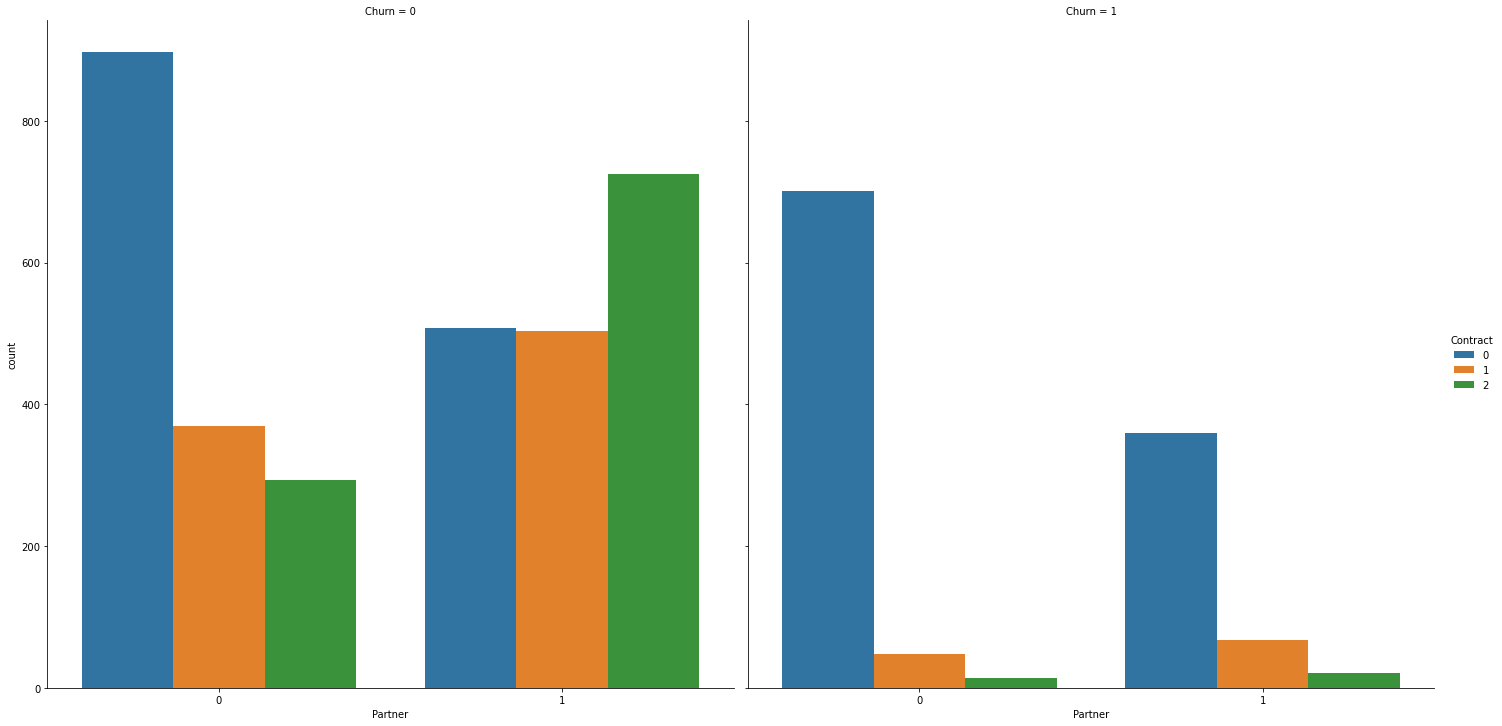

In [34]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='Partner', hue='Contract', col='Churn', data=train, kind='count', height=10, aspect=1)

quelli che hanno il contratto per 1 anno e sono Partner non rinnovano. 
quelli che hanno il contratto per 2 anni e sono Partner non rinnovano. 



<Figure size 1440x720 with 0 Axes>

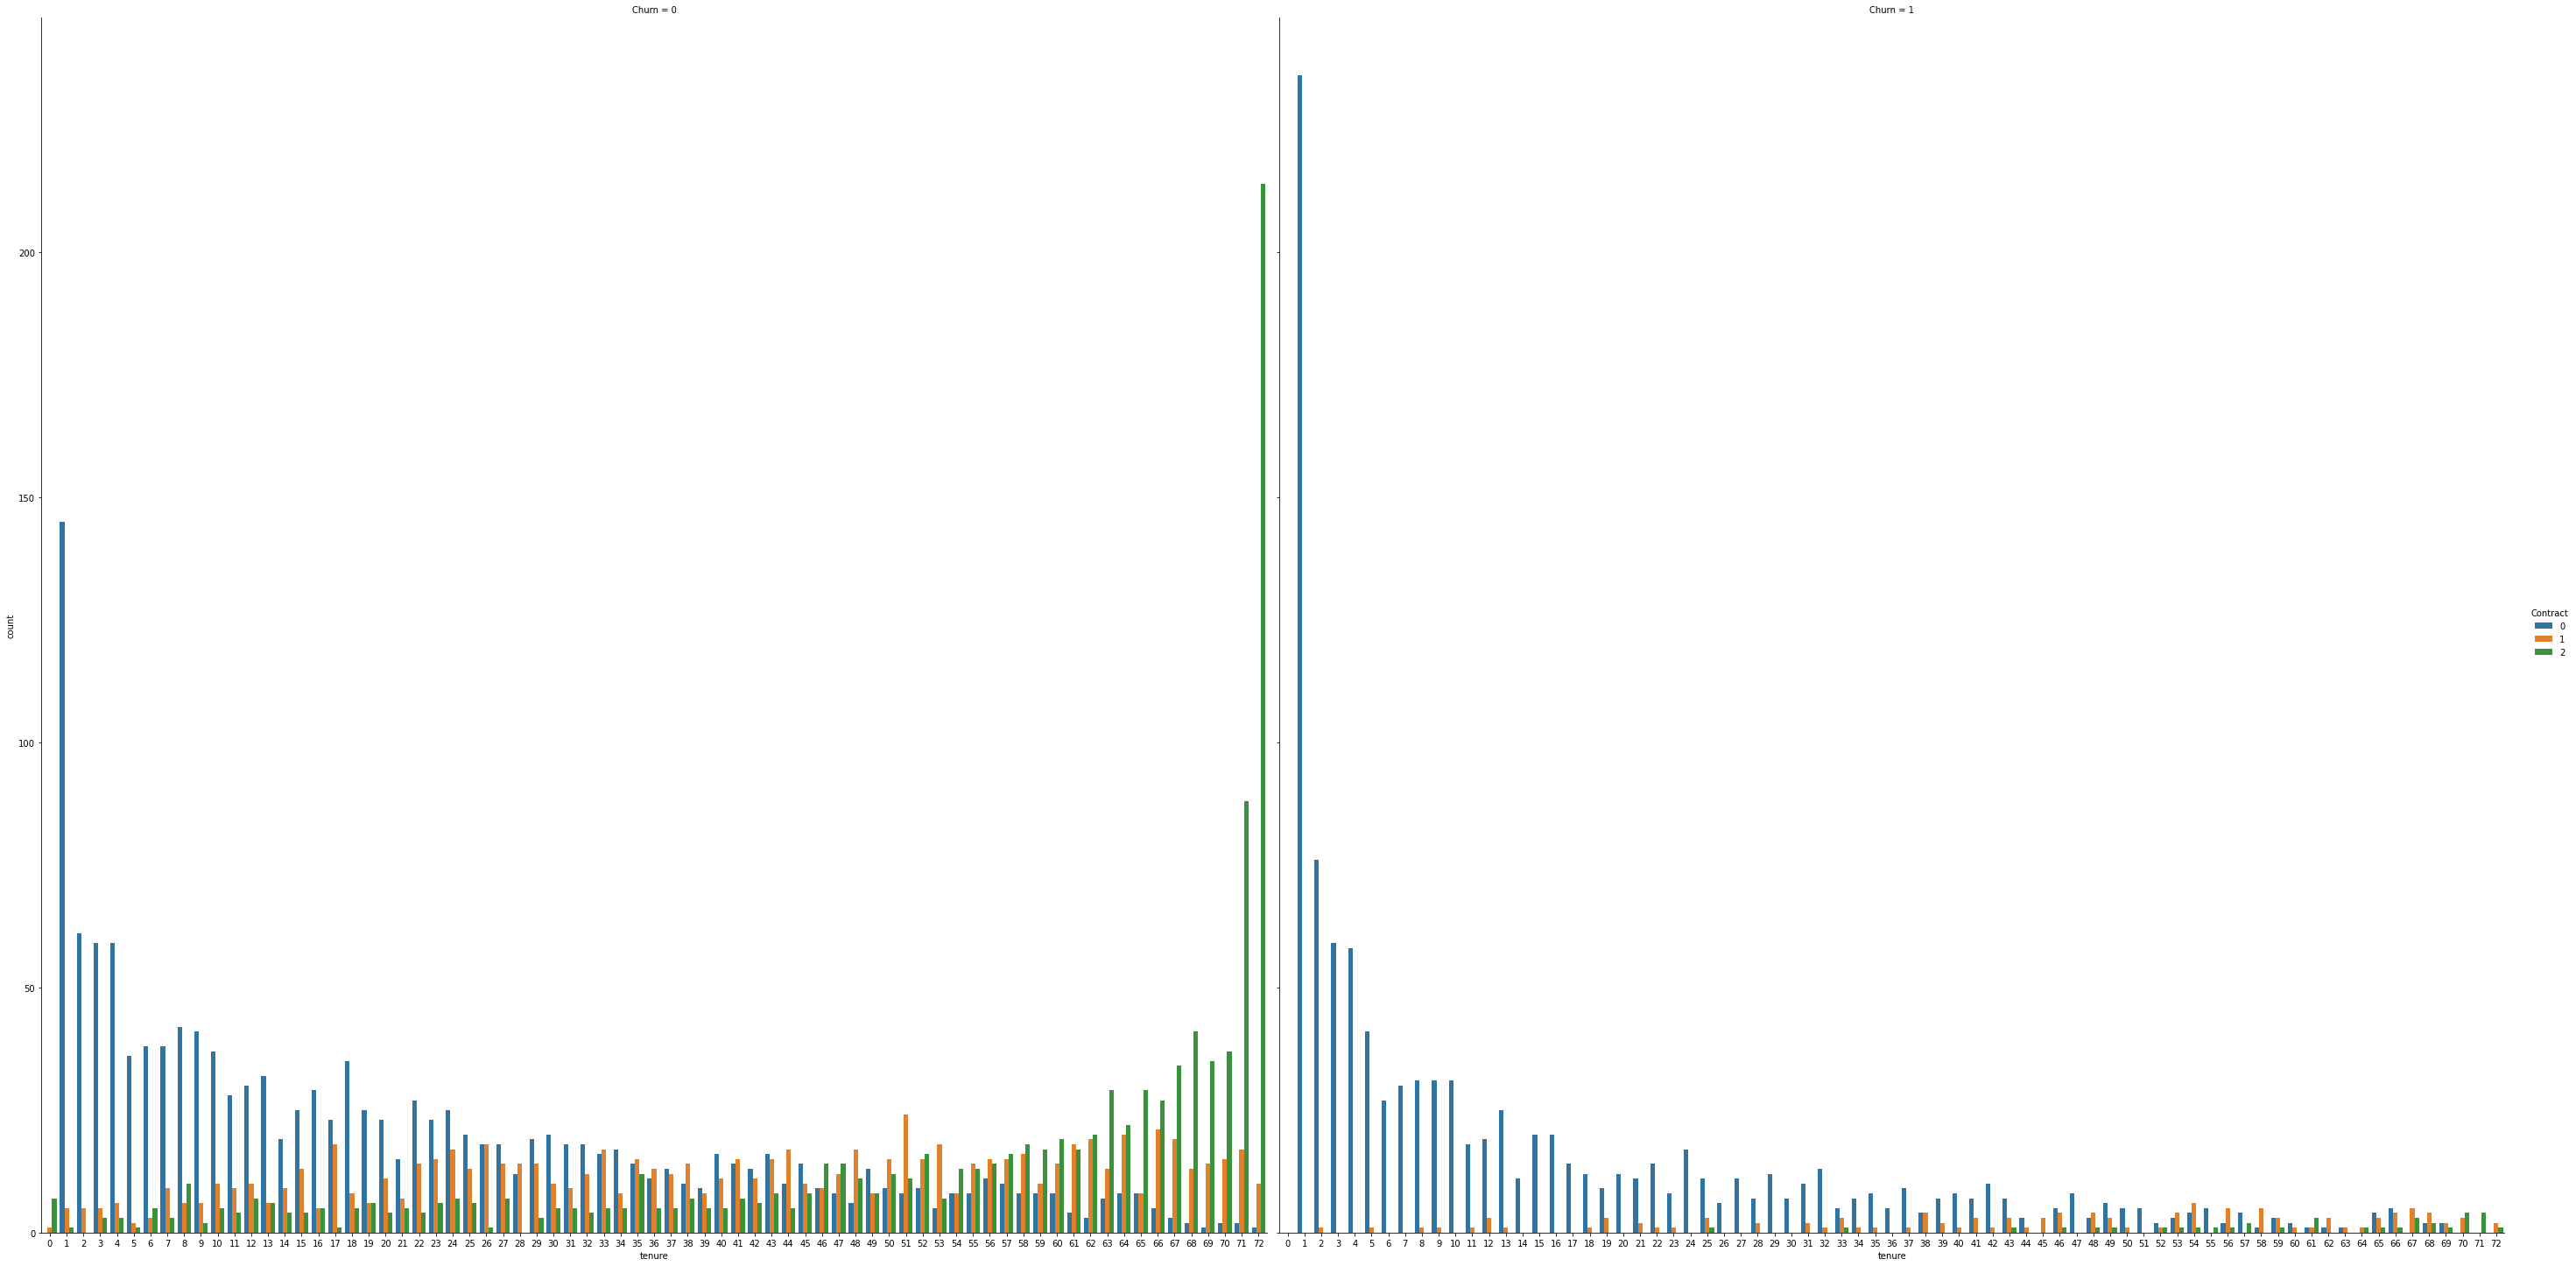

In [35]:
plt.figure(figsize=(20,10))
g=sns.catplot(x='tenure', hue='Contract', col='Churn', data=train, kind='count', height=20, aspect=1)

se un cliente è rimasto per 72 e ha la tipologia di contratto ad 1 anno molto probabilmente non rinnova

# Vedo delle variabili binarie quale mi può fare qualche differenza

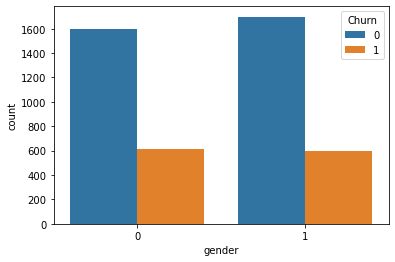

In [36]:
sns.countplot(x=train["gender"],hue=train["Churn"]);

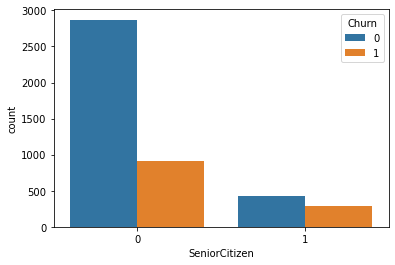

In [37]:
sns.countplot(x=train["SeniorCitizen"],hue=train["Churn"]);

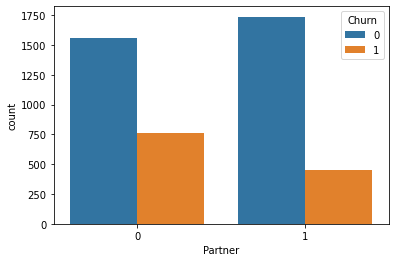

In [38]:
sns.countplot(x=train["Partner"],hue=train["Churn"]);

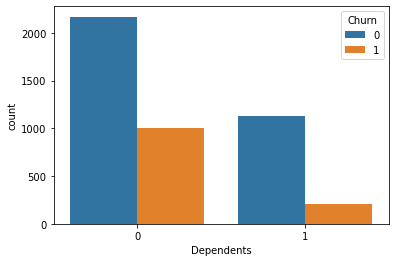

In [39]:
sns.countplot(x=train["Dependents"],hue=train["Churn"]);

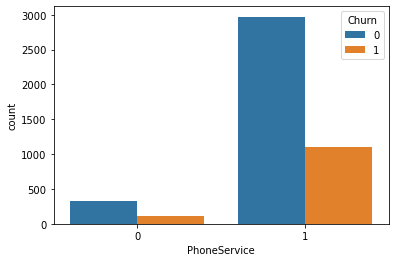

In [40]:
sns.countplot(x=train["PhoneService"],hue=train["Churn"]);

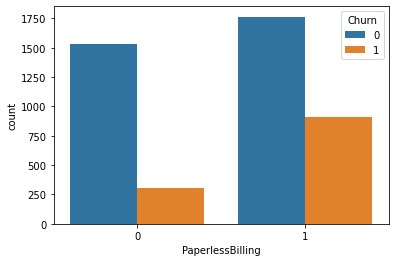

In [41]:
sns.countplot(x=train["PaperlessBilling"],hue=train["Churn"]);

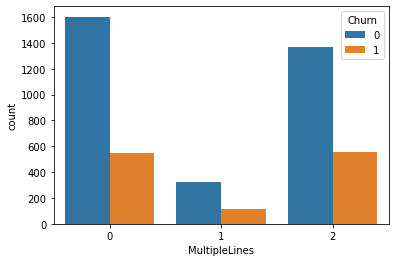

In [42]:
sns.countplot(x=train["MultipleLines"],hue=train["Churn"]);

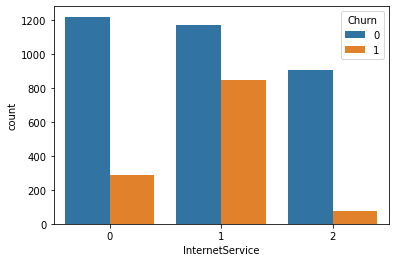

In [43]:
sns.countplot(x=train["InternetService"],hue=train["Churn"]);

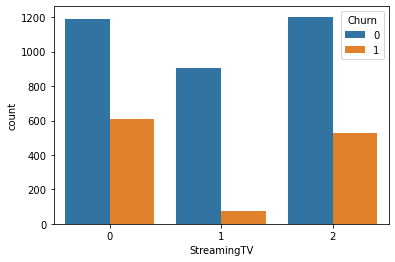

In [44]:
sns.countplot(x=train["StreamingTV"],hue=train["Churn"]);

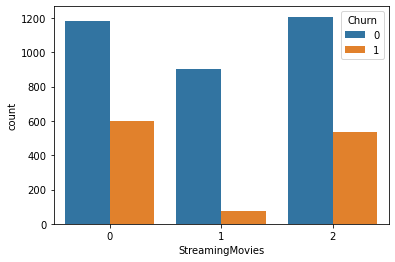

In [45]:
sns.countplot(x=train["StreamingMovies"],hue=train["Churn"]);

# Mi stampo una heatmap che mi guarda quale sia la correlazione che ho fra le feature:
- valore negativo -> relazione di proporzionalità inversa
- valore positivo -> relazione di proporzionalità diretta
- valore pari a zero-> no correlazione (feture può essere eliminata

<AxesSubplot:>

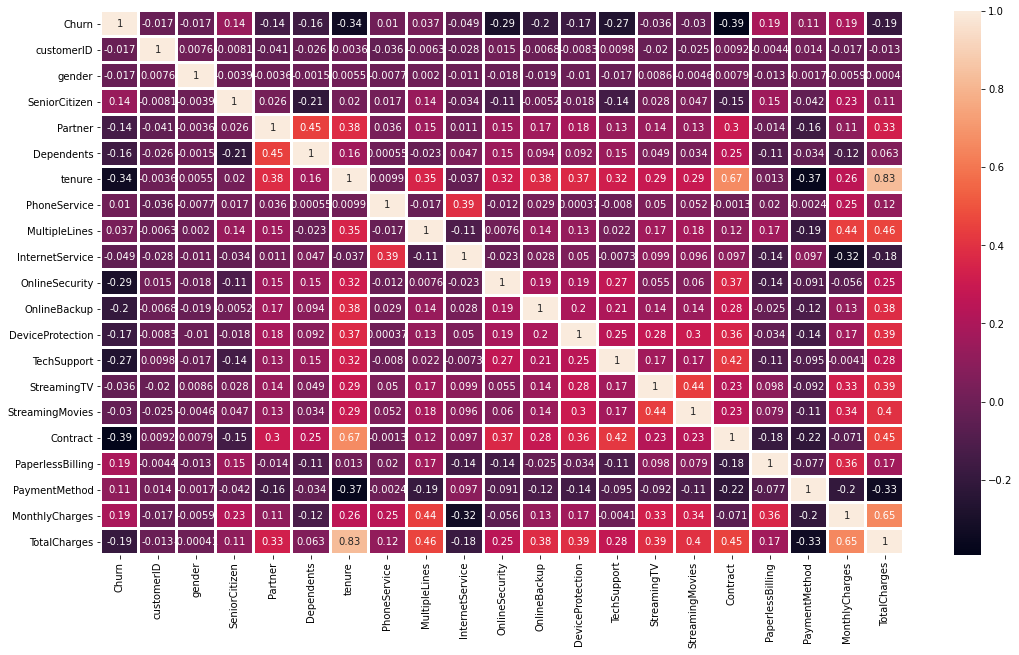

In [46]:
plt.figure(figsize=(18,10))
correlation = train.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

dalla heatmap vediamo che customerID, gender, PhoneService MultipleLines, InternetService, StreamingTv, StreamingMovie non sono utili per il nostro scopo.
quindi si possono droppare


In [47]:
toDrop = ['customerID','gender','PhoneService','MultipleLines','InternetService', 'StreamingTV','StreamingMovies']
train = train.drop(toDrop, axis=1)

In [48]:

toDrop = ['customerID','gender','PhoneService','MultipleLines','InternetService', 'StreamingTV','StreamingMovies']
test = test.drop(toDrop, axis=1)

vediamo inoltre nella heatmap che TotalCharges è molto correlato con Tenure in maniera direttamente proporzionale in quanto hanno una correlazione quasi pari a 1. quindi posso eliminare TotalCharges perchè ha una correlazione con Churn inferiore a quella che ha Tenure con Churn

In [49]:
toDrop = ['TotalCharges']
test = test.drop(toDrop, axis=1)

In [50]:
toDrop = ['TotalCharges']
train = train.drop(toDrop, axis=1)

# separo la label dalle features

In [51]:
y_train= train['Churn']
X_train=train.drop(['Churn'], axis=1)


y_test= test['Churn']
X_test=test.drop(['Churn'], axis=1)

# Provo diversi modelli

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
74.36


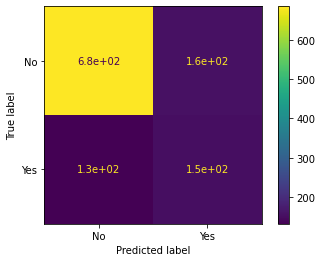



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
79.33


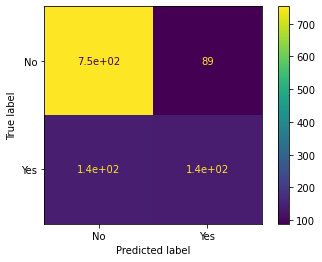



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
78.79


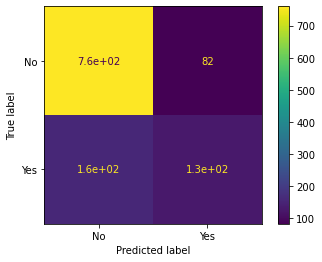

In [53]:
dt = DecisionTreeClassifier()
lr = LogisticRegression(random_state=0, max_iter = 10000)
rf = RandomForestClassifier()

models = [dt, lr, rf]
score = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_pred, y_test) * 100, 2)
    score.append(acc)
    print(model)
    print(acc)
    plot_confusion_matrix(model, X_test, y_test, values_format='n', display_labels=['No','Yes']) 
    plt.show() #sx predizioni giuste, dx predizioni sbagliate
    print("\n")

In [54]:
models = pd.DataFrame({

    'Model': ['Decision Tree','Logistic Regression', 'Random Forest'],

    'Score': score})
    
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,79.33
2,Random Forest,78.79
0,Decision Tree,74.36


<AxesSubplot:>

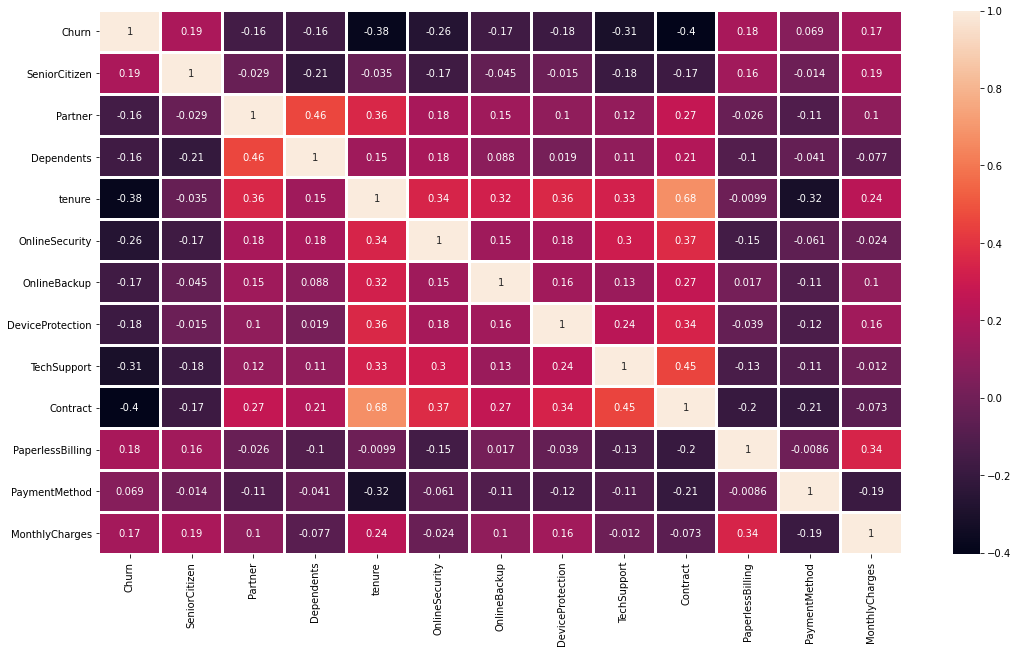

In [55]:
plt.figure(figsize=(18,10))
correlation = test.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       842
           1       0.61      0.45      0.52       285

    accuracy                           0.79      1127
   macro avg       0.72      0.68      0.69      1127
weighted avg       0.77      0.79      0.78      1127

